# Testing Algorithms

In [2]:
import pandas as pd
import numpy as np
import math
import os
import datetime
import matplotlib.pyplot as plt
import scipy.stats as sp
from imblearn.over_sampling import SMOTE 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 200)

TEST = False

## Retrieve the datasets

In [3]:
test_data = pd.read_csv("./encoded_test.csv", na_values= ['?', 'NA', ''],sep= ',')
train_data = pd.read_csv("./encoded_train.csv",na_values= ['?', 'NA', ''],sep=  ',')


## Build Prediction
This function builds the csv for submiting in kaggle

In [4]:
def build_prediction(pred):
    if TEST:
        
        pred = pd.DataFrame(pred, columns=['Predicted','col'])
        pred.drop('col', axis=1, inplace=True)
        loan_id = pd.DataFrame(test_data, columns=['loan_id'])

        results = pd.concat([loan_id, pred], axis=1)
        results = results.rename(
                columns={'loan_id': 'Id'})

        results.to_csv('results.csv', index = False)
       
        return results
    else:
        report = classification_report(y_test, pred, output_dict=True,zero_division= 0)

        print(f"Report:\n{classification_report(y_test, pred,zero_division= 0)}\n")

        sb.set(font_scale=1.0)
        
        ax = plt.subplot()
        cm = confusion_matrix(y_test, pred)

        sb.heatmap(cm, annot=True, ax=ax, fmt="g")

        ax.set_xlabel('Predicted');
        ax.set_ylabel('Observed');
        ax.set_title('Confusion Matrix');
        plt.show()


In [5]:
inputs = train_data.drop(columns=['loan_id', 'status'])
labels = train_data['status'].values
oversample = SMOTE(sampling_strategy='minority', random_state=1)

if (TEST):
    
    X_train = train_data.drop(columns=['loan_id', 'status'])
    y_train = train_data['status'].values

    X_train, y_train = oversample.fit_resample(inputs, labels)

    X_test = test_data.drop(columns=['loan_id', 'status'])
    y_test = test_data['status'].values
else:
    inputs, labels = oversample.fit_resample(inputs, labels)
    (X_train, X_test, y_train, y_test) = train_test_split(inputs, labels, test_size=0.25, random_state=1)



## Decision Tree

Report:
              precision    recall  f1-score   support

          -1       0.87      0.89      0.88        74
           1       0.88      0.85      0.86        67

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141




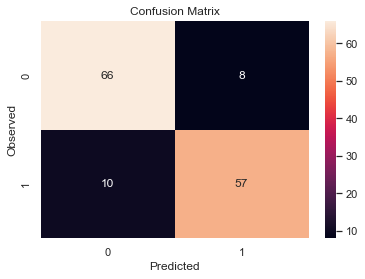

In [19]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
build_prediction(pred)


In [7]:
# parameter_grid = {'criterion': ['gini', 'entropy'],
#                   'splitter': ['best', 'random'],
#                   'max_depth': range(10, 20),
#                   'max_features': range(10,20)}

# grid_search = GridSearchCV(DecisionTreeClassifier(),
#                            param_grid=parameter_grid,
#                            cv=10,
#                            verbose=4,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)
# print('Best score: {}'.format(grid_search.best_score_))
# print('Best parameters: {}'.format(grid_search.best_params_))
# print('Best estimator: {}'.format(grid_search.best_estimator_))

In [8]:
# decision_tree_classifier = grid_search.best_estimator_

# pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
# build_prediction(pred)

## SVC 

Report:
              precision    recall  f1-score   support

          -1       0.57      0.73      0.64        74
           1       0.57      0.39      0.46        67

    accuracy                           0.57       141
   macro avg       0.57      0.56      0.55       141
weighted avg       0.57      0.57      0.55       141




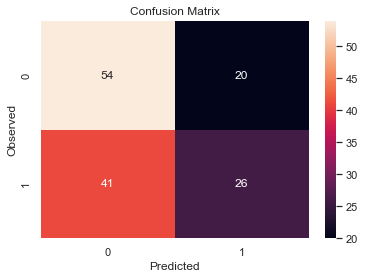

In [20]:

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred= svc.predict_proba(X_test) if TEST else svc.predict(X_test)
results=build_prediction(pred)

     

## Random Forest

Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        67

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141




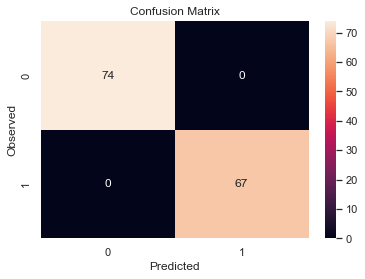

In [6]:
rf = RandomForestClassifier(400)
#rf = RFECV(rf, scoring='roc_auc')
rf.fit(X_train, y_train)
pred= rf.predict_proba(X_test) if TEST else rf.predict(X_test)
build_prediction(pred)

## Gaussian Naive Bayes

Report:
              precision    recall  f1-score   support

          -1       0.58      0.82      0.68        74
           1       0.63      0.33      0.43        67

    accuracy                           0.59       141
   macro avg       0.60      0.58      0.55       141
weighted avg       0.60      0.59      0.56       141




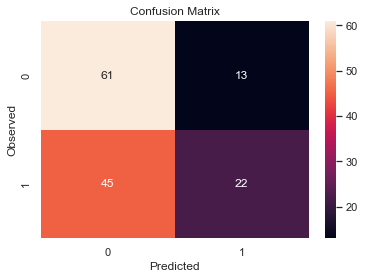

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

## Stochastic gradient descent

Report:
              precision    recall  f1-score   support

          -1       0.58      0.82      0.68        74
           1       0.63      0.33      0.43        67

    accuracy                           0.59       141
   macro avg       0.60      0.58      0.55       141
weighted avg       0.60      0.59      0.56       141




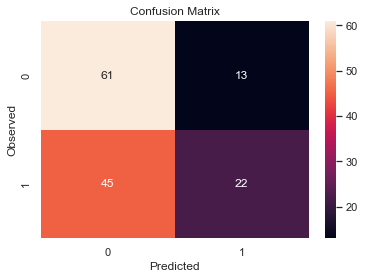

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

## Multi-layer Perceptron classifier

Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96        74
           1       1.00      0.91      0.95        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141




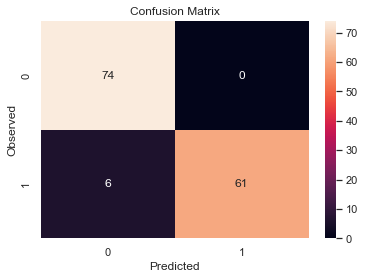

In [9]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
scaler = StandardScaler()
scaler.fit(X_train,y_test)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)
#clf = RFECV(clf, scoring='roc_auc')

clf.fit(X_train_nn, y_train)
pred= clf.predict_proba(X_test_nn) if TEST else clf.predict(X_test_nn)
build_prediction(pred)

Report:
              precision    recall  f1-score   support

          -1       0.72      0.85      0.78        74
           1       0.80      0.64      0.71        67

    accuracy                           0.75       141
   macro avg       0.76      0.75      0.75       141
weighted avg       0.76      0.75      0.75       141




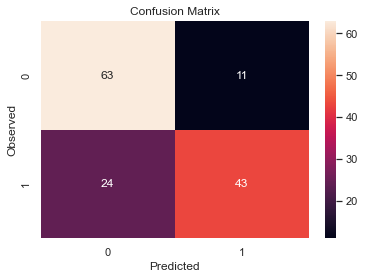

In [11]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test_nn)
build_prediction(pred)

In [89]:
clf = MLPClassifier(random_state=1, max_iter=300)
scaler = StandardScaler()
scaler.fit(X_train,y_train)
scaler = RFECV(scaler, scoring='roc_auc')

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)
#clf = RFECV(clf, scoring='roc_auc')

clf.fit(X_train_nn, y_train)
pred= clf.predict_proba(X_test_nn) if TEST else clf.predict(X_test_nn)
build_prediction(pred)

NotFittedError: This RFECV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
parameter_space = {
    'hidden_layer_sizes': [5,7,13,17,21,29],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate': ['constant','adaptive']}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(clf, param_grid=parameter_space, cv=cross_validation)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))
#Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 29, 'learning_rate': 'constant', 'solver': 'adam'}
clf = grid_search.best_estimator_
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)

ValueError: Invalid parameter activation for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [1]:
clf = MLPClassifier(random_state=1, max_iter=300,activation= 'relu', hidden_layer_sizes=29, learning_rate= 'constant', solver= 'adam').fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

NameError: name 'MLPClassifier' is not defined

## Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

,Id,Predicted
0,5895,0.000875
1,5172,0.000041
2,6207,0.007211
3,7122,0.999132
4,7067,0.000576
...,...,...
349,7294,0.000353
350,6321,0.023269
351,6469,0.001614
352,5614,0.000243


Report:
              precision    recall  f1-score   support

          -1       0.87      0.91      0.89        74
           1       0.89      0.85      0.87        67

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141




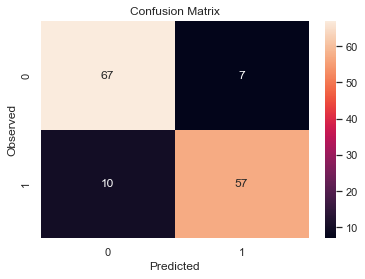

In [27]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)